In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
#from ImageDataset import ImageDataset
from image_dataset import ImageDataset
from torch import nn
import torch

# Set the path to the folder containing your unlabeled images
train_path = "data/DIV2K/train"
test_path = "data/DIV2K/valid"

# Define the transformation to be applied to each image
transform = transforms.Compose([
    #transforms.Resize((256, 256)),  # Resize the image to a fixed size
    transforms.RandomCrop((512,512)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()  # Convert the image to a tensor
])

# Create the ImageFolder dataset
train_data = ImageDataset(train_path, transform=transform)

test_data = ImageDataset(test_path, transform=transform)

In [2]:
from torch.utils.data import DataLoader
train_data_loader = DataLoader(dataset=train_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_data_loader = DataLoader(dataset=test_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

In [3]:
#img, label = train_data[0][0], train_data[0][1]
img = train_data[0]
#class_names = train_data.classes
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"img range = [{torch.min(img)}, {torch.max(img)}]")
#print(f"Image label: {label}")
#print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.4784, 0.4863, 0.4902,  ..., 0.6902, 0.8039, 0.8392],
         [0.4549, 0.4549, 0.4510,  ..., 0.6863, 0.8235, 0.8706],
         [0.4275, 0.4000, 0.3647,  ..., 0.7490, 0.8235, 0.8784],
         ...,
         [0.0980, 0.0980, 0.0980,  ..., 0.4000, 0.4118, 0.5059],
         [0.0941, 0.0980, 0.0941,  ..., 0.4039, 0.4431, 0.5020],
         [0.0980, 0.1059, 0.0902,  ..., 0.4431, 0.4392, 0.4588]],

        [[0.1255, 0.1255, 0.1412,  ..., 0.2745, 0.4196, 0.5373],
         [0.1216, 0.1137, 0.1333,  ..., 0.3098, 0.4784, 0.5569],
         [0.1216, 0.1059, 0.0902,  ..., 0.3843, 0.4824, 0.5569],
         ...,
         [0.0588, 0.0588, 0.0588,  ..., 0.3373, 0.3255, 0.3647],
         [0.0549, 0.0588, 0.0549,  ..., 0.3725, 0.3490, 0.4000],
         [0.0588, 0.0667, 0.0510,  ..., 0.3608, 0.3333, 0.3490]],

        [[0.2157, 0.2392, 0.2549,  ..., 0.3333, 0.4863, 0.6078],
         [0.2196, 0.2157, 0.2196,  ..., 0.3569, 0.5098, 0.6314],
         [0.2118, 0.1804, 0.1490,  ..., 0.45

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

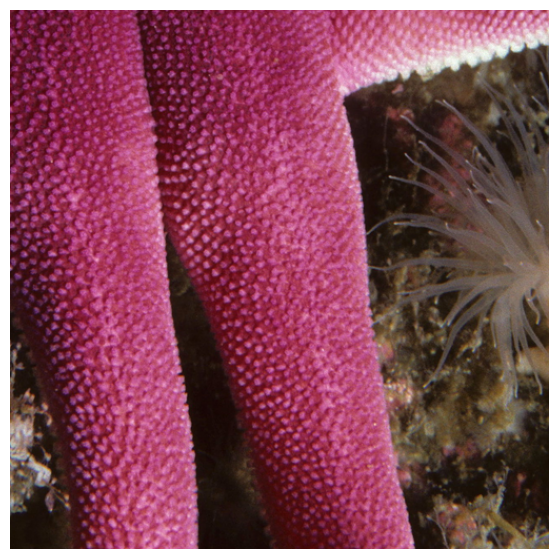

In [4]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
#plt.title(class_names[label], fontsize=14)

In [5]:
next(iter(train_data_loader)).shape

torch.Size([8, 3, 512, 512])

In [6]:
from pathlib import Path
# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "autoencoder_upsampler_re2_vgg.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [7]:
from autoencoder_upscale_model import AutoencoderUpscaleModel
import torch
from my_upscale_model import UpscaleModel
from my_upscale_model2 import UpscaleModel2
from autoencoder_upsampler_2 import AutoencoderUpsampler2
from train_autoencoder import downsample_image

device = "cpu"

batch = next(iter(test_data_loader))

#model = UpscaleModel2()
model = AutoencoderUpsampler2()

model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

model.to(device)

img = downsample_image(batch, 4)
model.eval()
with torch.inference_mode():
    result = model(img.to(device))



Original shape: torch.Size([3, 256, 256]) -> [color_channels, height, width]
Image permute shape: torch.Size([256, 256, 3]) -> [height, width, color_channels]


(-0.5, 255.5, 255.5, -0.5)

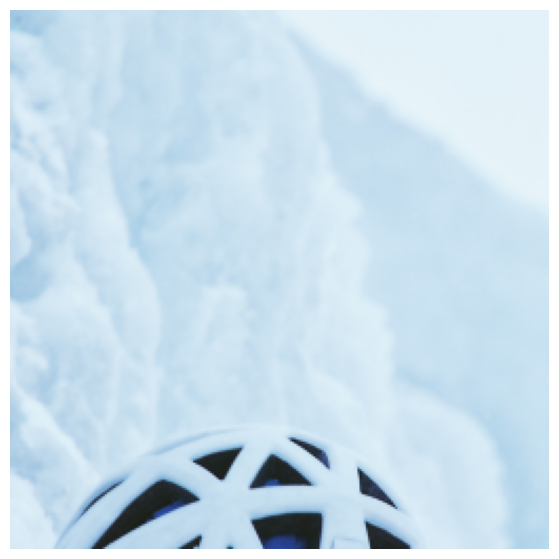

In [8]:
img = downsample_image(batch)[1]
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [9]:
img

tensor([[[0.6294, 0.6461, 0.6471,  ..., 0.8902, 0.8902, 0.8902],
         [0.6196, 0.6363, 0.6441,  ..., 0.8902, 0.8902, 0.8902],
         [0.6225, 0.6275, 0.6333,  ..., 0.8902, 0.8902, 0.8902],
         ...,
         [0.8471, 0.8471, 0.8471,  ..., 0.7167, 0.7255, 0.7324],
         [0.8382, 0.8431, 0.8412,  ..., 0.7186, 0.7235, 0.7314],
         [0.8324, 0.8343, 0.8402,  ..., 0.7216, 0.7235, 0.7284]],

        [[0.7794, 0.7912, 0.7892,  ..., 0.9490, 0.9490, 0.9490],
         [0.7804, 0.7843, 0.7892,  ..., 0.9490, 0.9490, 0.9490],
         [0.7843, 0.7794, 0.7794,  ..., 0.9490, 0.9490, 0.9490],
         ...,
         [0.9176, 0.9176, 0.9176,  ..., 0.8461, 0.8510, 0.8549],
         [0.9147, 0.9176, 0.9157,  ..., 0.8480, 0.8490, 0.8529],
         [0.9098, 0.9127, 0.9147,  ..., 0.8510, 0.8510, 0.8520]],

        [[0.8843, 0.8931, 0.8912,  ..., 0.9765, 0.9765, 0.9765],
         [0.8843, 0.8882, 0.8902,  ..., 0.9765, 0.9765, 0.9765],
         [0.8833, 0.8824, 0.8853,  ..., 0.9765, 0.9765, 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

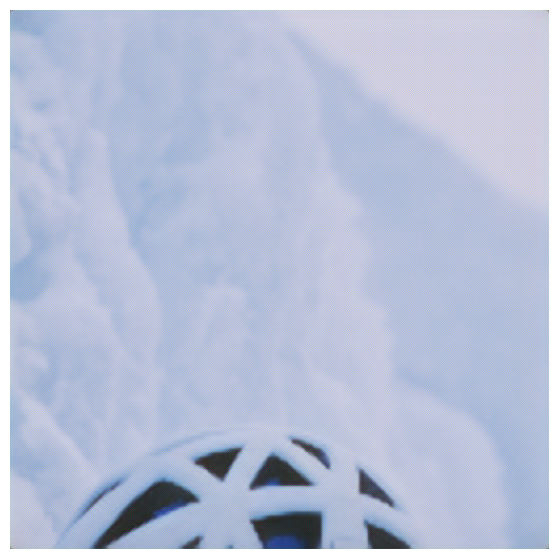

In [10]:
img = result[1].cpu()
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [11]:
result.shape

torch.Size([8, 3, 512, 512])

In [12]:
img.shape

torch.Size([3, 512, 512])

In [13]:
result[1]

tensor([[[0.4459, 0.5712, 0.5792,  ..., 0.6204, 0.6382, 0.5242],
         [0.5151, 0.6266, 0.5734,  ..., 0.7748, 0.7230, 0.6711],
         [0.5422, 0.6211, 0.6333,  ..., 0.7314, 0.8118, 0.6881],
         ...,
         [0.6384, 0.7239, 0.6987,  ..., 0.6781, 0.5902, 0.6307],
         [0.6042, 0.6670, 0.6848,  ..., 0.5578, 0.6814, 0.4981],
         [0.5089, 0.5705, 0.6186,  ..., 0.5730, 0.5003, 0.4713]],

        [[0.5131, 0.5712, 0.6169,  ..., 0.7180, 0.6947, 0.5647],
         [0.6072, 0.6444, 0.6262,  ..., 0.8165, 0.7290, 0.6714],
         [0.6536, 0.6481, 0.6938,  ..., 0.7661, 0.7786, 0.7098],
         ...,
         [0.6602, 0.7319, 0.7280,  ..., 0.6805, 0.6731, 0.6336],
         [0.6400, 0.6928, 0.7577,  ..., 0.7067, 0.6518, 0.6486],
         [0.5151, 0.6657, 0.6500,  ..., 0.6136, 0.5816, 0.5167]],

        [[0.5656, 0.6783, 0.6925,  ..., 0.7299, 0.6304, 0.5490],
         [0.6698, 0.7486, 0.8400,  ..., 0.7436, 0.7876, 0.6433],
         [0.6603, 0.8162, 0.7323,  ..., 0.8655, 0.7777, 0.

In [14]:
img1 = downsample_image(batch, factor=4)
img1.shape

torch.Size([8, 3, 128, 128])

In [15]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[ 1.2857e-02,  6.4450e-02,  3.2528e-03,  ..., -9.2507e-03,
            4.7438e-02, -3.5793e-02],
          [ 2.4117e-02,  1.9863e-02, -1.7894e-02,  ...,  2.6636e-02,
           -1.2621e-02, -4.0984e-02],
          [ 2.2995e-02,  4.6128e-02,  1.1412e-02,  ..., -4.4772e-02,
           -2.2337e-02, -1.3459e-02],
          ...,
          [-4.7004e-02, -2.3192e-02, -6.3140e-02,  ...,  6.8840e-03,
            6.4958e-02, -3.7561e-02],
          [ 1.0717e-03,  4.3197e-02,  5.9312e-02,  ...,  4.9695e-02,
           -6.1176e-02,  4.5577e-02],
          [ 5.3265e-02, -7.2812e-02,  1.1344e-02,  ...,  1.3584e-02,
            2.0364e-02,  1.2676e-02]],

         [[-3.6996e-02, -5.1930e-02, -3.5207e-02,  ..., -8.9599e-03,
           -3.3548e-02, -9.4310e-03],
          [-1.9703e-02,  4.2125e-02, -9.4820e-03,  ..., -4.1917e-04,
           -1.0869e-02,  2.5308e-02],
          [-1.0620e-02, -6.1592e-02,  5.0215e-03,  ...,  2.8119e-02,
           -5.8011e-02, -4.2696e-02]

In [16]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [17]:
batch.shape, result.shape

(torch.Size([8, 3, 512, 512]), torch.Size([8, 3, 512, 512]))

In [18]:
loss = loss_fn(result, batch.to(device))
loss

tensor(95602.9531)

In [19]:
type(model)

autoencoder_upsampler_2.AutoencoderUpsampler2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

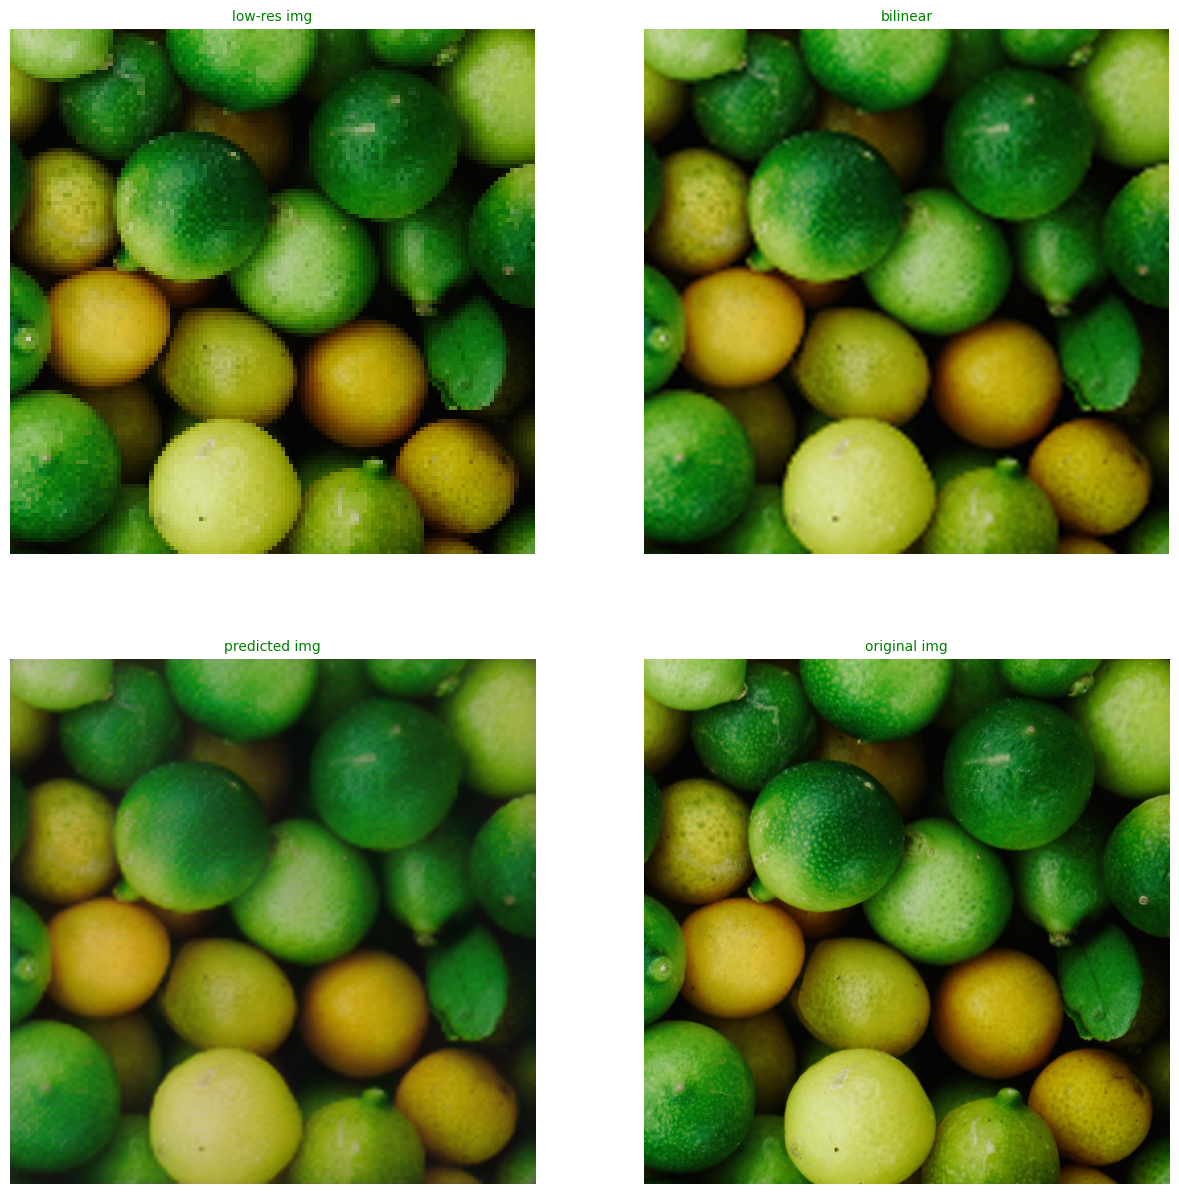

In [34]:
i = 0
y = batch[i]
y_pred = result[i]

upsample = nn.Upsample(scale_factor=4, mode="bicubic")

# Plot predictions
plt.figure(figsize=(15, 15))
nrows = 2
ncols = 2

plt.subplot(nrows, ncols, 1)
plt.imshow(downsample_image(y.unsqueeze(dim=0), factor=4).squeeze().permute(1, 2, 0))
plt.title("low-res img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 2)
plt.imshow(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)).squeeze().permute(1, 2, 0))
plt.title("bilinear", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 3)
plt.imshow(y_pred.permute(1, 2, 0))
plt.title("predicted img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 4)
plt.imshow(y.permute(1, 2, 0))
plt.title("original img", fontsize=10, c="g") # green text if correct
plt.axis(False)

In [21]:
from vgg_loss import VGGLoss
vgg_loss_fn = VGGLoss(device="cpu")


d:\oleyon\github_repo\deep_learning_diploma\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\oleyon\github_repo\deep_learning_diploma\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
some_loss = vgg_loss_fn.forward_demo(batch[i])
some_loss.shape

torch.Size([512, 64, 64])

In [23]:
i=0
for param in vgg_loss_fn.vgg.parameters():
    print(param.shape)
    i+=1
i

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])


20

Original shape: torch.Size([64, 64]) -> [height, width]


(-0.5, 63.5, 63.5, -0.5)

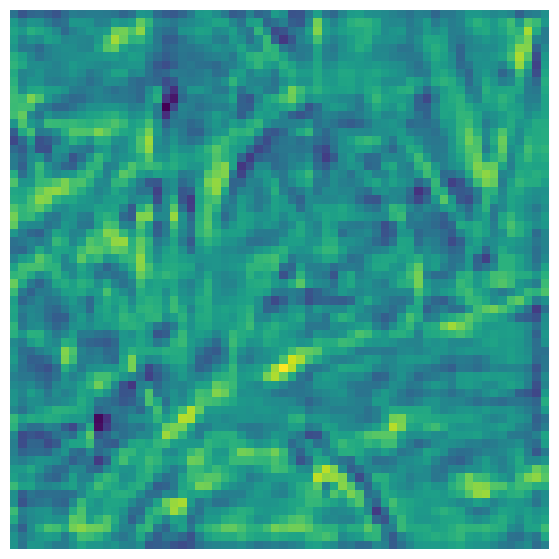

In [24]:
img = some_loss[11].cpu()

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [height, width]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")

In [25]:
# from collections import OrderedDict

# import torch
# from torch import nn, optim

# from ignite.engine import *
# from ignite.handlers import *
# from ignite.metrics import *
# from ignite.utils import *
# from ignite.contrib.metrics.regression import *
# from ignite.contrib.metrics import *

# # create default evaluator for doctests

# def eval_step(engine, batch):
#     return batch

# default_evaluator = Engine(eval_step)

# # create default optimizer for doctests

# param_tensor = torch.zeros([1], requires_grad=True)
# default_optimizer = torch.optim.SGD([param_tensor], lr=0.1)

# # create default trainer for doctests
# # as handlers could be attached to the trainer,
# # each test must define his own trainer using `.. testsetup:`

# def get_default_trainer():

#     def train_step(engine, batch):
#         return batch

#     return Engine(train_step)

# # create default model for doctests

# default_model = nn.Sequential(OrderedDict([
#     ('base', nn.Linear(4, 2)),
#     ('fc', nn.Linear(2, 1))
# ]))

# #manual_seed(666)

# test_y_pred = torch.randn((3,512,512))

# from ignite.metrics import *
# metric = SSIM(data_range=1.0)
# metric.attach(default_evaluator, 'ssim')
# state = default_evaluator.run([[y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0)]])
# print(state.metrics['ssim'])
# print(f"ssim loss = {torch.tensor((1 - state.metrics['ssim'])/2)}")

In [26]:
# from custom_loss import SSIMLoss, VGGPerceptualLoss, SSIM, CombinedLoss

# ssim_loss_fn = SSIM(window_size=11,sigma=1.5)
# vgg_loss_fn = VGGPerceptualLoss()
# vgg_ssim_fn = CombinedLoss(loss_shift=1.0)
# ssim_loss_res = ssim_loss_fn(y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0))
# vgg_loss_fn.to('cuda')
# vgg_loss_res = vgg_loss_fn(y_pred.unsqueeze(dim=0).to('cuda'), y.unsqueeze(dim=0).to('cuda'))
# true_loss_res = vgg_ssim_fn(y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0))
# loss_res = vgg_loss_res + 1 * ssim_loss_res
# #vgg_loss_fn.to('cuda')
# for param in vgg_loss_fn.parameters():
#     print(param.device)
# ssim_loss_res, vgg_loss_res, loss_res, true_loss_res

In [27]:
import math

window_size = 11
sigma = 1.5
gauss = torch.Tensor([math.exp(-(x - window_size // 2) ** 2 / float(2 * sigma ** 2)) for x in range(window_size)])
window = gauss.unsqueeze(0) * gauss.unsqueeze(1)

In [28]:
gauss

tensor([0.0039, 0.0286, 0.1353, 0.4111, 0.8007, 1.0000, 0.8007, 0.4111, 0.1353,
        0.0286, 0.0039])

(-0.5, 10.5, 10.5, -0.5)

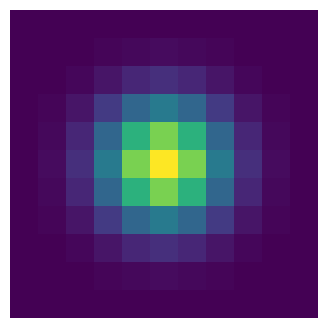

In [29]:
plt.figure(figsize=(4, 4))
plt.imshow(window)
plt.axis("off")

In [30]:
from train_statistics import TrainingStatisticsLogger
import os
print(os.getcwd())
logger = TrainingStatisticsLogger()
logger.load_from_json(filename='log/autoencoder_upsampler_re_test_log.json')
logger.ssim

d:\oleyon\github_repo\deep_learning_diploma\diploma


[0.03529925458133221,
 0.0483977273106575,
 0.09543241773332868,
 0.17812544852495193,
 0.2196930753333228,
 0.19303095127855027,
 0.2136421799659729,
 0.22207076208932058,
 0.24304171332291194,
 0.27035702764987946,
 0.2728869787284306,
 0.30175767626081196,
 0.28294684844357626,
 0.29743640763419016,
 0.3319910594395229,
 0.32242954628808157,
 0.315739312342235,
 0.3410152622631618,
 0.3459026387759617,
 0.3418125680514744,
 0.33436587878635954,
 0.3350448097501482,
 0.323603412934712,
 0.3542272278240749,
 0.38509614978517803,
 0.374527599130358,
 0.3494489533560617,
 0.3972801182951246,
 0.3891837937491281,
 0.4141432430062975,
 0.45058158891541616,
 0.5219908612115043,
 0.5872023275920323,
 0.608162488256182,
 0.6012741753033229,
 0.6439149124281747,
 0.6372361608913967,
 0.6510754653385707,
 0.6663808652332851,
 0.654070258140564]

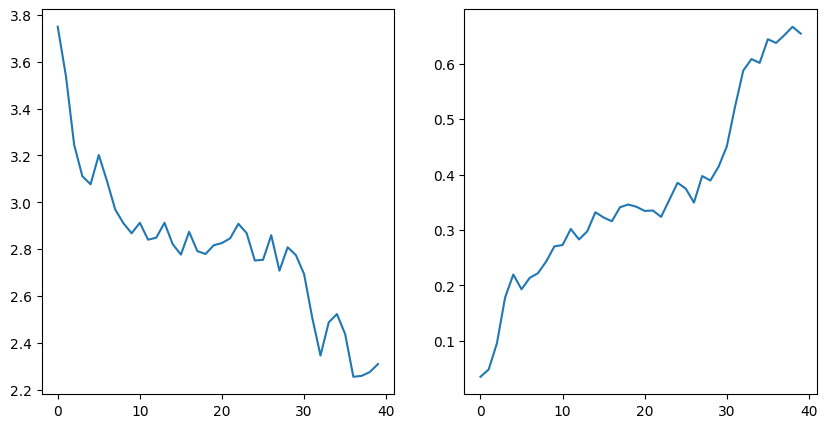

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(logger.epoch_loss)
plt.subplot(1,2,2)
plt.plot(logger.ssim)